In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from feature_engine import imputation as mdi
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('causes-of-death-in-children.csv')

In [3]:
df.shape

(5539, 40)

In [4]:
df.head()

,Entity,Code,Year,Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Meningitis - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number),Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number),...,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG],Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD],"Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]","Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]",Poverty gap at $1.90 a day (2011 PPP) (%) [SI.POV.GAPS],Poverty gap at $3.20 a day (2011 PPP) (%) [SI.POV.LMIC.GP],Poverty gap at $5.50 a day (2011 PPP) (%) [SI.POV.UMIC.GP]
0,Afghanistan,AFG,1990,21,10,1709,1779,7112,2455,20224,...,NaN,NaN,NaN,NaN,NaN,15.241,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1991,41,12,1743,1822,7574,2385,20879,...,NaN,NaN,NaN,NaN,NaN,14.783,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1992,51,13,1954,2069,8614,2370,23585,...,NaN,NaN,NaN,NaN,NaN,14.362,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1993,24,16,2252,2427,9458,2659,27116,...,NaN,NaN,NaN,NaN,NaN,13.974,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1994,52,19,2446,2649,9823,3187,29271,...,NaN,NaN,NaN,NaN,NaN,13.616,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Malaria - Sex: Both - Age: Under 5 (Number)',
       'Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Meningitis - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Measles - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Drowning - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Tuberculosis - Sex: Bot

In [6]:
df.rename(columns = {'Entity':'entity', 'Code':'code', 'Year':'year','Deaths - Malaria - Sex: Both - Age: Under 5 (Number)': 'deaths_malaria','Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number)': 'deaths_hiv',
'Deaths - Meningitis - Sex: Both - Age: Under 5 (Number)': 'deaths_meningitis','Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)':'deaths_nutritional_def',
'Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number)':'deaths_other_nd','Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number)':'deaths_cough',
'Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)':'deaths_lorespi','Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)':'deaths_congenital',
'Deaths - Measles - Sex: Both - Age: Under 5 (Number)':'deaths_measles','Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number)':'deaths_neonatal_inf',
'Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number)':'deaths_encephalopathy','Deaths - Drowning - Sex: Both - Age: Under 5 (Number)':'deaths_drowning',
'Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number)':'deaths_tuberculosis','Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number)':'deaths_preterm_b',
'Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)':'deaths_diarrheal','Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)':'deaths_neoplasms',
'Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)':'deaths_syphilis','Deaths - All causes - Sex: Both - Age: 7-27 days (Number)':'age_7to27_days',
'Deaths - All causes - Sex: Both - Age: 1-4 years (Number)':'age_1to4_years','Deaths - All causes - Sex: Both - Age: 0-6 days (Number)':'age_0to6_days',
'Deaths - All causes - Sex: Both - Age: 28-364 days (Number)':'age_28to364_days','Mortality rate, under-5, female (per 1,000 live births)':'mortality_rate_female',
'Mortality rate, under-5, male (per 1,000 live births)':'mortality_rate_male','Mortality rate, under-5 (per 1,000 live births)':'mortality_rate',
'$1.90 per day - share of population below poverty line':'population_povertyline','Current health expenditure per capita, PPP (current international $)':'health_expenditure',
'Population (historical estimates)':'population_estimates', 'Access to electricity (% of population) [EG.ELC.ACCS.ZS]':'electricity_access' ,'Adjusted net national income (annual % growth) [NY.ADJ.NNTY.KD.ZG]': 'annual_growth',
'Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]': 'incomeUS','Adjusted net national income per capita (annual % growth) [NY.ADJ.NNTY.PC.KD.ZG]': 'annual_growth_pc',
'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]': 'incomeUS_pc',
'Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]': 'death_rate(per1000)',
'Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]': 'education_exp',
'Poverty gap at $1.90 a day (2011 PPP) (%) [SI.POV.GAPS]':'pg_1.90',
'Poverty gap at $3.20 a day (2011 PPP) (%) [SI.POV.LMIC.GP]':'pg_3.20',
'Poverty gap at $5.50 a day (2011 PPP) (%) [SI.POV.UMIC.GP]':'pg_5.50'}, inplace = True)

In [7]:
df.head()

,entity,code,year,deaths_malaria,deaths_hiv,deaths_meningitis,deaths_nutritional_def,deaths_other_nd,deaths_cough,deaths_lorespi,...,electricity_access,annual_growth,incomeUS,annual_growth_pc,incomeUS_pc,death_rate(per1000),education_exp,pg_1.90,pg_3.20,pg_5.50
0,Afghanistan,AFG,1990,21,10,1709,1779,7112,2455,20224,...,NaN,NaN,NaN,NaN,NaN,15.241,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1991,41,12,1743,1822,7574,2385,20879,...,NaN,NaN,NaN,NaN,NaN,14.783,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1992,51,13,1954,2069,8614,2370,23585,...,NaN,NaN,NaN,NaN,NaN,14.362,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1993,24,16,2252,2427,9458,2659,27116,...,NaN,NaN,NaN,NaN,NaN,13.974,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1994,52,19,2446,2649,9823,3187,29271,...,NaN,NaN,NaN,NaN,NaN,13.616,NaN,NaN,NaN,NaN


In [8]:
df.drop(['pg_1.90', 'pg_3.20', 'pg_5.50','annual_growth', 'annual_growth_pc'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

entity                       0
code                         0
year                         0
deaths_malaria               0
deaths_hiv                   0
deaths_meningitis            0
deaths_nutritional_def       0
deaths_other_nd              0
deaths_cough                 0
deaths_lorespi               0
deaths_congenital            0
deaths_measles               0
deaths_neonatal_inf          0
deaths_encephalopathy        0
deaths_drowning              0
deaths_tuberculosis          0
deaths_preterm_b             0
deaths_diarrheal             0
deaths_neoplasms             0
deaths_syphilis              0
age_7to27_days               0
age_1to4_years               0
age_0to6_days                0
age_28to364_days             0
mortality_rate_female      174
mortality_rate_male        174
mortality_rate             174
population_povertyline     938
health_expenditure        2105
population_estimates         0
electricity_access         753
incomeUS                   894
incomeUS

In [10]:
df.population_povertyline.value_counts()

0.000000     268
0.479826      19
2.713015      12
0.094068      10
0.492201      10
            ... 
9.813117       1
9.553720       1
8.778929       1
8.067617       1
33.216590      1
Name: population_povertyline, Length: 4106, dtype: int64

In [11]:
df.population_povertyline.fillna(0,inplace=True)

In [12]:
df.isnull().sum()  ##Este se va actualizando conforme se hacen cambios

entity                       0
code                         0
year                         0
deaths_malaria               0
deaths_hiv                   0
deaths_meningitis            0
deaths_nutritional_def       0
deaths_other_nd              0
deaths_cough                 0
deaths_lorespi               0
deaths_congenital            0
deaths_measles               0
deaths_neonatal_inf          0
deaths_encephalopathy        0
deaths_drowning              0
deaths_tuberculosis          0
deaths_preterm_b             0
deaths_diarrheal             0
deaths_neoplasms             0
deaths_syphilis              0
age_7to27_days               0
age_1to4_years               0
age_0to6_days                0
age_28to364_days             0
mortality_rate_female      174
mortality_rate_male        174
mortality_rate             174
population_povertyline       0
health_expenditure        2105
population_estimates         0
electricity_access         753
incomeUS                   894
incomeUS

In [13]:
df.education_exp

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5534    30.015150
5535    29.470831
5536    23.527081
5537    20.874201
5538    19.039841
Name: education_exp, Length: 5539, dtype: float64

In [14]:
impmedian= mdi.MeanMedianImputer(imputation_method='median', variables=['mortality_rate_female', 'mortality_rate_male', 'mortality_rate', 'education_exp'])
df = impmedian.fit_transform(df) 

In [15]:
impmean= mdi.MeanMedianImputer(imputation_method='mean', variables=['health_expenditure', 'electricity_access', 'death_rate(per1000)', 'population_povertyline'])
df = impmean.fit_transform(df) 

In [16]:
df= df.replace(to_replace = np.nan, value = 0)

In [17]:
nul_health= df.groupby('entity', as_index = False)['health_expenditure'].sum()

In [18]:
nul_health

,entity,health_expenditure
0,Afghanistan,15732.674221
1,Albania,19674.539698
2,Algeria,21949.261805
3,Andorra,60885.851223
4,Angola,14182.451849
...,...,...
186,Venezuela,29041.120080
187,Vietnam,15529.692408
188,Yemen,17065.093488
189,Zambia,13471.228388


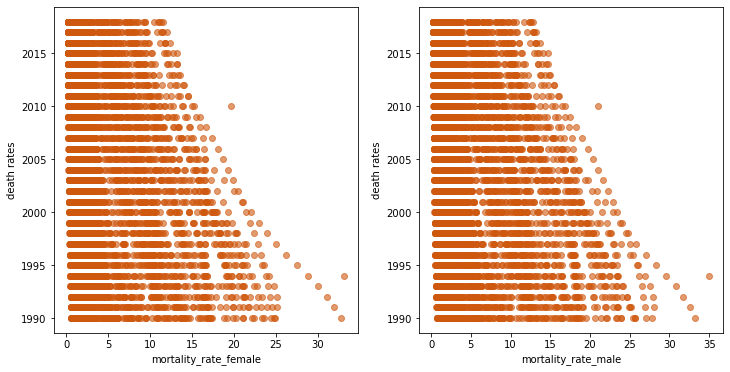

In [19]:
cols=['mortality_rate_female','mortality_rate_male', 'year']
df_plot =df[cols]
fig,axes = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)
for i in range(2):
    plt.sca(axes[i])
    plt.scatter(df_plot.iloc[:,i],df['year'], color="#cf580f", alpha = 0.6)
    plt.xlabel(df_plot.iloc[:,i].name)
    plt.ylabel('death rates')

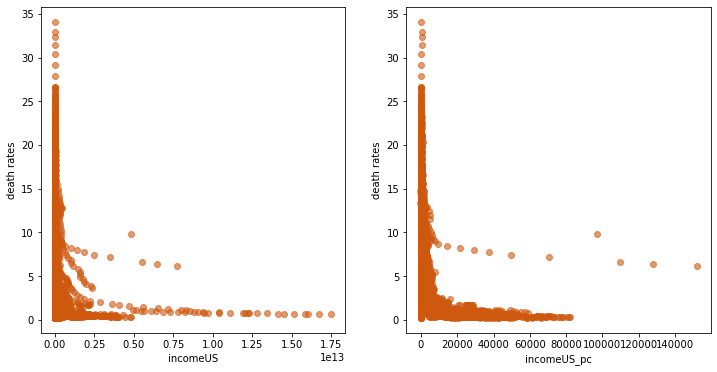

In [20]:
cols=['incomeUS','incomeUS_pc', 'mortality_rate']
df_plot =df[cols]
fig,axes = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)
for i in range(2):
    plt.sca(axes[i])
    plt.scatter(df_plot.iloc[:,i],df['mortality_rate'], color="#cf580f", alpha = 0.6)
    plt.xlabel(df_plot.iloc[:,i].name)
    plt.ylabel('death rates')

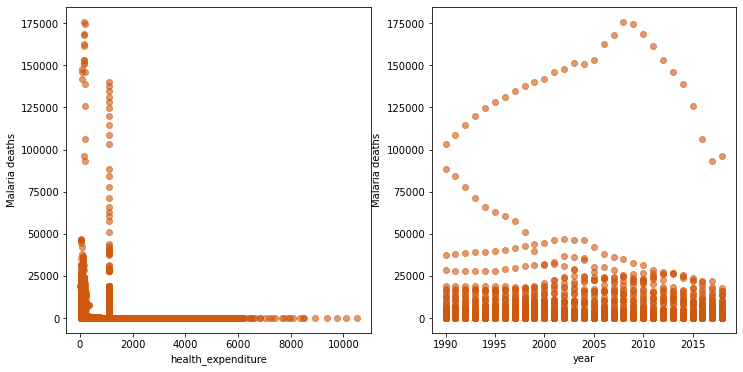

In [21]:
cols=['health_expenditure','year', 'deaths_malaria']
df_plot =df[cols]
fig,axes = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)
for i in range(2):
    plt.sca(axes[i])
    plt.scatter(df_plot.iloc[:,i],df['deaths_malaria'], color="#cf580f", alpha = 0.6)
    plt.xlabel(df_plot.iloc[:,i].name)
    plt.ylabel('Malaria deaths')

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5539.0,2.004000e+03,8.367356e+00,1.990000e+03,1.997000e+03,2.004000e+03,2.011000e+03,2.018000e+03
deaths_malaria,5539.0,2.478189e+03,1.152931e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.600000e+01,1.759250e+05
deaths_hiv,5539.0,6.845819e+02,2.521886e+03,0.000000e+00,0.000000e+00,5.000000e+00,1.455000e+02,2.094200e+04
deaths_meningitis,5539.0,1.071036e+03,4.240166e+03,0.000000e+00,4.000000e+00,3.800000e+01,4.395000e+02,5.315900e+04
deaths_nutritional_def,5539.0,1.344526e+03,7.186252e+03,0.000000e+00,1.000000e+00,1.200000e+01,4.940000e+02,1.905240e+05
deaths_other_nd,5539.0,2.456880e+03,1.485920e+04,0.000000e+00,2.300000e+01,1.620000e+02,9.840000e+02,2.223060e+05
deaths_cough,5539.0,8.306415e+02,3.771404e+03,0.000000e+00,0.000000e+00,1.600000e+01,3.495000e+02,6.827800e+04
deaths_lorespi,5539.0,7.062429e+03,3.148504e+04,0.000000e+00,1.900000e+01,2.770000e+02,4.007000e+03,5.220860e+05
deaths_congenital,5539.0,3.322136e+03,1.100792e+04,0.000000e+00,8.300000e+01,4.280000e+02,2.357500e+03,1.636720e+05
deaths_measles,5539.0,1.926389e+03,8.803262e+03,0.000000e+00,0.000000e+00,1.000000e+00,3.210000e+02,1.406890e+05


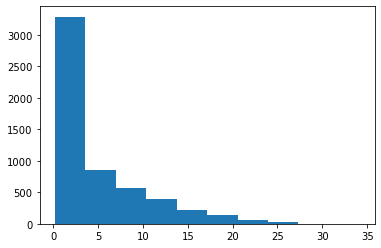

In [23]:
plt.hist(df.mortality_rate)
plt.show()

<AxesSubplot:xlabel='deaths_malaria'>

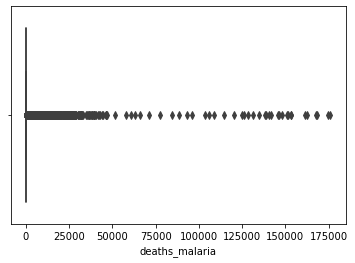

In [24]:
sns.boxplot(x=df["deaths_malaria"])

In [25]:
suma_dis= df.groupby('year', as_index = False)[['deaths_malaria', 'deaths_hiv',
       'deaths_meningitis', 'deaths_nutritional_def', 'deaths_other_nd',
       'deaths_cough', 'deaths_lorespi', 'deaths_congenital', 'deaths_measles',
       'deaths_neonatal_inf', 'deaths_encephalopathy', 'deaths_drowning',
       'deaths_tuberculosis', 'deaths_preterm_b', 'deaths_diarrheal',
       'deaths_neoplasms', 'deaths_syphilis']].sum()

In [26]:
from ipywidgets import interact

<AxesSubplot:xlabel='population_povertyline', ylabel='mortality_rate'>

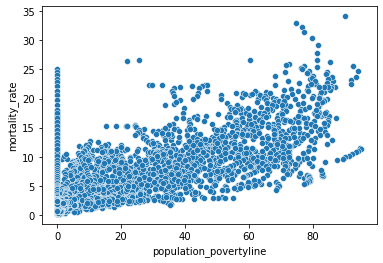

In [27]:
sns.scatterplot(x ='population_povertyline', y= 'mortality_rate', data=df)

<AxesSubplot:xlabel='health_expenditure', ylabel='mortality_rate'>

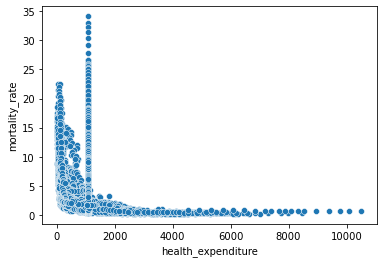

In [28]:
sns.scatterplot(x ='health_expenditure', y= 'mortality_rate', data=df)

<AxesSubplot:xlabel='education_exp', ylabel='mortality_rate'>

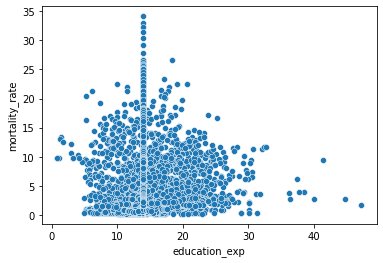

In [29]:
sns.scatterplot(x ='education_exp', y= 'mortality_rate', data=df)

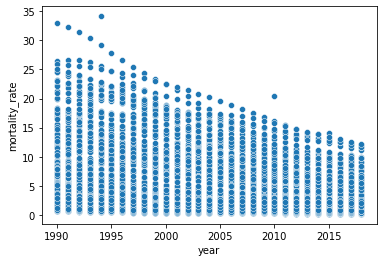

In [30]:
sns.scatterplot(x ='year', y= 'mortality_rate', data=df)
import plotly.express as px

In [31]:
@interact
def scatter(x= 'year', y = ['deaths_malaria', 'deaths_hiv',
       'deaths_meningitis', 'deaths_nutritional_def', 'deaths_other_nd',
       'deaths_cough', 'deaths_lorespi', 'deaths_congenital', 'deaths_measles',
       'deaths_neonatal_inf', 'deaths_encephalopathy', 'deaths_drowning',
       'deaths_tuberculosis', 'deaths_preterm_b', 'deaths_diarrheal',
       'deaths_neoplasms', 'deaths_syphilis']):
      return px.scatter(suma_dis, x, y, )

interactive(children=(Text(value='year', description='x'), Dropdown(description='y', options=('deaths_malaria'…

In [32]:
@interact
def scatter(x= 'year', y = ['age_7to27_days', 'age_1to4_years',
       'age_0to6_days', 'age_28to364_days']):
      return px.scatter(df, x, y )

interactive(children=(Text(value='year', description='x'), Dropdown(description='y', options=('age_7to27_days'…

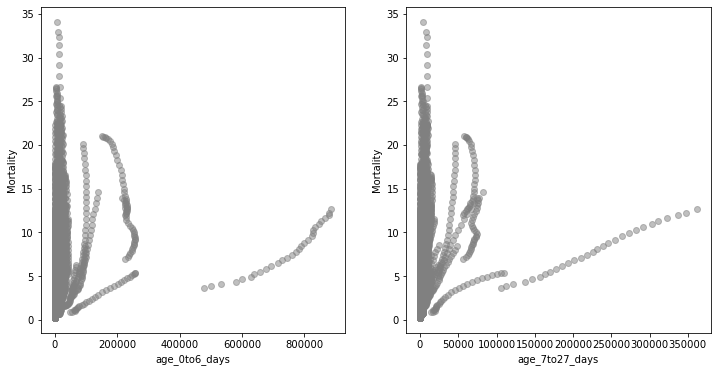

In [33]:
cols=[ 'age_0to6_days','age_7to27_days', 'mortality_rate']
df_plot =df[cols]
fig,axes = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)
for i in range(2):
    plt.sca(axes[i])
    plt.scatter(df_plot.iloc[:,i],df['mortality_rate'], color="gray", alpha = 0.5)
    plt.xlabel(df_plot.iloc[:,i].name)
    plt.ylabel('Mortality')

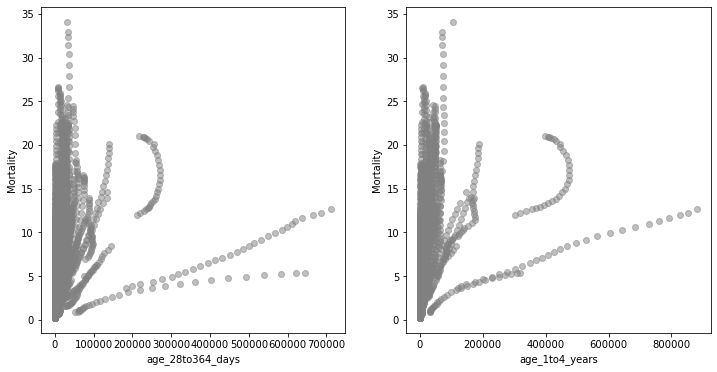

In [34]:
cols=[ 'age_28to364_days','age_1to4_years', 'mortality_rate']
df_plot =df[cols]
fig,axes = plt.subplots(figsize = (12,6), nrows = 1, ncols = 2)
for i in range(2):
    plt.sca(axes[i])
    plt.scatter(df_plot.iloc[:,i],df['mortality_rate'], color="gray", alpha = 0.5)
    plt.xlabel(df_plot.iloc[:,i].name)
    plt.ylabel('Mortality')

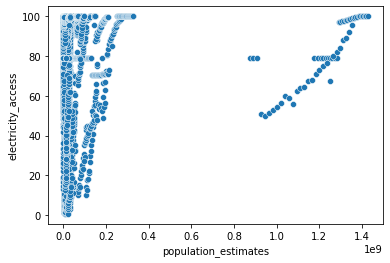

In [35]:
sns.scatterplot(x ='population_estimates', y= 'electricity_access', data=df)
import plotly.express as px

In [36]:
suma_mor= df.groupby('entity',as_index = False)[['mortality_rate']].mean()
lista= list(suma_mor.sort_values(by='mortality_rate',ascending=False).head(20).entity)

In [37]:
lista

['Sierra Leone',
 'Niger',
 'Chad',
 'Nigeria',
 'Mali',
 'Angola',
 'Somalia',
 'Liberia',
 'South Sudan',
 'Central African Republic',
 'Burkina Faso',
 'Guinea',
 'Guinea-Bissau',
 'Mozambique',
 'Equatorial Guinea',
 'Malawi',
 'Rwanda',
 'Benin',
 'Burundi',
 "Cote d'Ivoire"]

In [38]:
model = ols('mortality_rate ~ population_povertyline+ health_expenditure+population_estimates + electricity_access + incomeUS + incomeUS_pc + education_exp', data=df).fit()
anova_table = sm.stats.anova_lm(model)
anova_table.sort_values(by=['PR(>F)']) 

,df,sum_sq,mean_sq,F,PR(>F)
population_povertyline,1.0,88206.717182,88206.717182,8966.518265,0.000000e+00
electricity_access,1.0,3769.268050,3769.268050,383.159150,1.503335e-82
incomeUS_pc,1.0,2406.416908,2406.416908,244.620612,5.466939e-54
health_expenditure,1.0,1128.743731,1128.743731,114.740709,1.629692e-26
population_estimates,1.0,391.556088,391.556088,39.803032,3.027310e-10
education_exp,1.0,142.144418,142.144418,14.449472,1.455184e-04
incomeUS,1.0,53.744367,53.744367,5.463301,1.945541e-02
Residual,5531.0,54410.345053,9.837343,NaN,NaN


In [39]:
df.entity.nunique()

191

In [40]:
paises= df.entity.value_counts().reset_index()
paises= list(paises['index'])
print(sorted(paises))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamai

In [41]:
latinoamerica= 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Cayman Islands', 'Cuba', 'Dominica', 'Dominican Republic', 'Grenada', 'Guadeloupe', 'Haiti', 'Jamaica', 'Martinique','Puerto Rico','Trinidad and Tobago', 'Turks and Caicos Islands', 'Virgin Islands', 'Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'

In [42]:
final = [x for x in latinoamerica if x in paises]
len(final)

31

In [43]:
df_latin=df[df['entity'].isin(final)]
df_latin.columns

Index(['entity', 'code', 'year', 'deaths_malaria', 'deaths_hiv',
       'deaths_meningitis', 'deaths_nutritional_def', 'deaths_other_nd',
       'deaths_cough', 'deaths_lorespi', 'deaths_congenital', 'deaths_measles',
       'deaths_neonatal_inf', 'deaths_encephalopathy', 'deaths_drowning',
       'deaths_tuberculosis', 'deaths_preterm_b', 'deaths_diarrheal',
       'deaths_neoplasms', 'deaths_syphilis', 'age_7to27_days',
       'age_1to4_years', 'age_0to6_days', 'age_28to364_days',
       'mortality_rate_female', 'mortality_rate_male', 'mortality_rate',
       'population_povertyline', 'health_expenditure', 'population_estimates',
       'electricity_access', 'incomeUS', 'incomeUS_pc', 'death_rate(per1000)',
       'education_exp'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='mortality_rate'>

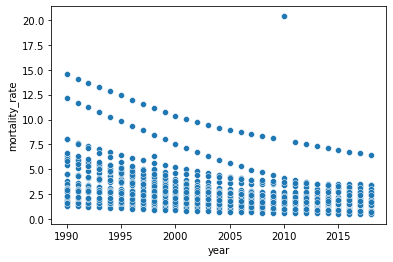

In [44]:
sns.scatterplot(x ='year', y= 'mortality_rate', data=df_latin)

In [45]:
df_latin.mortality_rate.min()

0.530000019

In [46]:
df_latin.mortality_rate.max()

20.36000061

In [47]:
df_latin.head()

,entity,code,year,deaths_malaria,deaths_hiv,deaths_meningitis,deaths_nutritional_def,deaths_other_nd,deaths_cough,deaths_lorespi,...,mortality_rate_male,mortality_rate,population_povertyline,health_expenditure,population_estimates,electricity_access,incomeUS,incomeUS_pc,death_rate(per1000),education_exp
145,Antigua and Barbuda,ATG,1990,0,0,1,0,1,0,1,...,1.52,1.40,0.0,1088.976174,62533,95.763046,0.0,0.0,6.980,14.01654
146,Antigua and Barbuda,ATG,1991,0,0,1,0,1,0,1,...,1.55,1.43,0.0,1088.976174,63363,95.940651,0.0,0.0,7.008,14.01654
147,Antigua and Barbuda,ATG,1992,0,0,0,0,1,0,1,...,1.59,1.46,0.0,1088.976174,64459,96.118134,0.0,0.0,7.009,14.01654
148,Antigua and Barbuda,ATG,1993,0,0,0,0,1,0,2,...,1.63,1.50,0.0,1088.976174,65777,96.294945,0.0,0.0,6.979,14.01654
149,Antigua and Barbuda,ATG,1994,0,0,0,0,1,0,2,...,1.67,1.53,0.0,1088.976174,67201,96.470390,0.0,0.0,6.918,14.01654


In [48]:
df_latin= df_latin.assign(region="Latin America")
df_latin.head(3)

,entity,code,year,deaths_malaria,deaths_hiv,deaths_meningitis,deaths_nutritional_def,deaths_other_nd,deaths_cough,deaths_lorespi,...,mortality_rate,population_povertyline,health_expenditure,population_estimates,electricity_access,incomeUS,incomeUS_pc,death_rate(per1000),education_exp,region
145,Antigua and Barbuda,ATG,1990,0,0,1,0,1,0,1,...,1.40,0.0,1088.976174,62533,95.763046,0.0,0.0,6.980,14.01654,Latin America
146,Antigua and Barbuda,ATG,1991,0,0,1,0,1,0,1,...,1.43,0.0,1088.976174,63363,95.940651,0.0,0.0,7.008,14.01654,Latin America
147,Antigua and Barbuda,ATG,1992,0,0,0,0,1,0,1,...,1.46,0.0,1088.976174,64459,96.118134,0.0,0.0,7.009,14.01654,Latin America


In [49]:
df_latin.to_csv("paises_latam.csv", index=False)

In [50]:
df_latam= df_latin.groupby('year',as_index = False)[['mortality_rate','population_povertyline', 'health_expenditure','incomeUS_pc', 'education_exp']].mean()
df_latam.head(3)

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp
0,1990,4.527419,13.838380,1088.976174,1824.630151,13.812568
1,1991,4.352258,13.042217,1088.976174,1962.336529,14.031872
2,1992,4.182581,12.424689,1088.976174,2092.501273,13.943351


In [51]:
df_latam['lag1'] = df_latam.mortality_rate.shift(1)

In [52]:
df_latam= df_latam.iloc[1:30] 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_latam.drop(['mortality_rate', 'year'], axis=1), 
                                                    df_latam['mortality_rate'], 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )

X_train.shape, X_test.shape

((22, 5), (6, 5))

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 18 to 7
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   population_povertyline  22 non-null     float64
 1   health_expenditure      22 non-null     float64
 2   incomeUS_pc             22 non-null     float64
 3   education_exp           22 non-null     float64
 4   lag1                    22 non-null     float64
dtypes: float64(5)
memory usage: 1.0 KB


In [55]:
ratelat_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('model', LinearRegression())], verbose = True)

In [56]:
ratelat_pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())],
         verbose=True)

In [57]:
X_train_pred = ratelat_pipeline.predict(X_train)

In [58]:
ratelat_pipeline.score(X_train, y_train)

0.9824925493061095

In [59]:
X_train_pred

array([2.36216468, 2.01781983, 2.917342  , 2.67077858, 2.44104685,
       4.07276814, 3.79058005, 3.68359861, 3.94097443, 2.42310037,
       2.02076104, 3.85662437, 1.98976129, 2.01253572, 2.25687033,
       1.87666723, 2.35035701, 3.32683443, 3.0060968 , 2.57534326,
       2.32917015, 3.45719181])

In [60]:
ratelat_pipeline.score(X_test, y_test)

0.9778668362206063

In [61]:
X_test_pred = ratelat_pipeline.predict(X_test)
X_test_pred

array([3.11690906, 1.93249174, 3.44942395, 1.98192249, 4.24992547,
       2.79265188])

In [62]:
y_test

10    3.047097
26    1.947742
9     3.235161
22    2.123548
1     4.352258
13    2.747742
Name: mortality_rate, dtype: float64

In [63]:
train= pd.DataFrame({'reales':y_train, "predict": X_train_pred})
test= pd.DataFrame({'reales':y_test, "predict": X_test_pred})

In [64]:
final_latam = pd.concat([train, test])
final_latam.head(5)

,reales,predict
18,2.361290,2.362165
23,2.071290,2.017820
12,2.839032,2.917342
14,2.659677,2.670779
16,2.501935,2.441047


In [65]:
final_latam["year"]= df_latam.year

In [66]:
final_latam = final_latam.reindex(columns=['year','reales','predict'])
final_latam.sort_values(by='year').head(3)

,year,reales,predict
1,1991,4.352258,4.249925
2,1992,4.182581,4.072768
3,1993,4.018710,3.940974


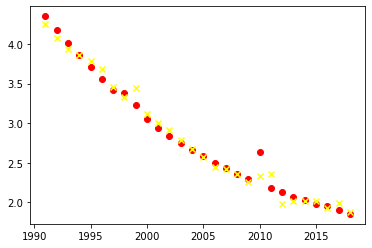

In [67]:
x=final_latam.year
plt.scatter(x, y= final_latam.reales, color = 'r')
plt.scatter(x, y=final_latam.predict, color = 'yellow', marker = 'x')

In [68]:
df_latam.to_csv("df_latam.csv", index=False)

In [69]:
final_latam.to_csv("predict_latam.csv", index=False)

In [70]:
#df_latam.index = pd.DatetimeIndex(df_latam.year)
#df_latam.index

In [71]:
#import statsmodels.api as sm
 
#res = sm.tsa.seasonal_decompose(df_latam.mortality_rate)
#resplot = res.plot()

In [72]:
europe= ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 
'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Gibraltar', 'Guadeloupe', 'Madeira', 'Martinique', 'Mayotte']

In [73]:
len(europe)

32

In [74]:
europe_list = [x for x in europe if x in paises]
print(sorted(europe_list))

['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']


In [75]:
df_euro=df[df['entity'].isin(europe_list)]

<AxesSubplot:xlabel='year', ylabel='mortality_rate'>

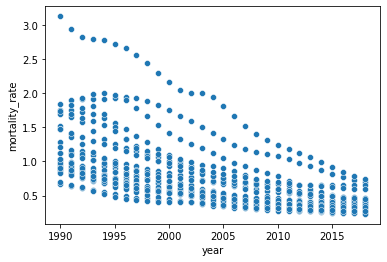

In [76]:
sns.scatterplot(x ='year', y= 'mortality_rate', data=df_euro)

In [77]:
df_euro[['entity', 'mortality_rate']].sort_values(by= 'mortality_rate')

,entity,mortality_rate
4494,Slovenia,0.23
1710,Finland,0.24
1709,Finland,0.24
1708,Finland,0.24
1594,Estonia,0.24
...,...,...
4093,Romania,2.78
4092,Romania,2.80
4091,Romania,2.83
4090,Romania,2.94


In [78]:
indice_europa= df_euro.groupby('entity',as_index = False)['mortality_rate'].mean()
indice_europa.sort_values(by= 'mortality_rate')

,entity,mortality_rate
26,Sweden,0.396897
8,Finland,0.399310
17,Luxembourg,0.439310
24,Slovenia,0.504828
25,Spain,0.520345
10,Germany,0.523448
9,France,0.535172
14,Italy,0.539655
6,Denmark,0.540690
0,Austria,0.543103


In [79]:
df_euro= df_euro.assign(region="Europe")
df_euro.head(3)

,entity,code,year,deaths_malaria,deaths_hiv,deaths_meningitis,deaths_nutritional_def,deaths_other_nd,deaths_cough,deaths_lorespi,...,mortality_rate,population_povertyline,health_expenditure,population_estimates,electricity_access,incomeUS,incomeUS_pc,death_rate(per1000),education_exp,region
261,Austria,AUT,1990,0,1,13,0,21,0,28,...,0.95,0.106457,1088.976174,7723954,100.0,1.410000e+11,18364.51611,10.8,11.51311,Europe
262,Austria,AUT,1991,0,1,13,0,20,0,26,...,0.91,0.141942,1088.976174,7772698,100.0,1.470000e+11,18917.09374,10.8,11.75021,Europe
263,Austria,AUT,1992,0,2,13,0,18,0,24,...,0.86,0.177428,1088.976174,7830938,100.0,1.650000e+11,21044.01528,10.6,11.75971,Europe


In [80]:
df_euro.to_csv("paises_europa.csv", index=False)

In [81]:
df_europe= df_euro.groupby('year',as_index = False)[['mortality_rate','population_povertyline', 'health_expenditure','incomeUS_pc', 'education_exp']].mean()
df_europe.head(2)

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp
0,1990,1.246667,0.360106,1088.976174,9251.041867,12.745594
1,1991,1.219259,0.407114,1088.976174,9412.506998,12.656721


In [82]:
df_europe['lag1'] = df_europe.mortality_rate.shift(1)

In [83]:
df_europe= df_europe.iloc[1:30] 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_europe.drop(['mortality_rate', 'year'], axis=1), 
                                                    df_europe['mortality_rate'], 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )

X_train.shape, X_test.shape

((22, 5), (6, 5))

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 18 to 7
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   population_povertyline  22 non-null     float64
 1   health_expenditure      22 non-null     float64
 2   incomeUS_pc             22 non-null     float64
 3   education_exp           22 non-null     float64
 4   lag1                    22 non-null     float64
dtypes: float64(5)
memory usage: 1.0 KB


In [86]:
ratelat_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('model', LinearRegression())], verbose = True)

In [87]:
ratelat_pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())],
         verbose=True)

In [88]:
X_train_pred = ratelat_pipeline.predict(X_train)

In [89]:
ratelat_pipeline.score(X_train, y_train)

0.9998997302673803

In [90]:
X_train_pred

array([0.54999916, 0.45676084, 0.72980584, 0.66759298, 0.60756898,
       1.17110226, 1.02943946, 0.9784672 , 1.12714715, 0.57598361,
       0.44299953, 1.0806252 , 0.41430616, 0.43351811, 0.52819924,
       0.4064821 , 0.48703465, 0.88126562, 0.76434991, 0.63825152,
       0.50668388, 0.93130546])

In [91]:
ratelat_pipeline.score(X_test, y_test)

0.9988362908732781

In [92]:
X_test_pred = ratelat_pipeline.predict(X_test)
X_test_pred

array([0.80154037, 0.42686948, 0.83623516, 0.4720311 , 1.19822411,
       0.69813082])

In [93]:
y_test

10    0.801111
26    0.422963
9     0.840741
22    0.473333
1     1.219259
13    0.700370
Name: mortality_rate, dtype: float64

In [94]:
train= pd.DataFrame({'reales':y_train, "predict": X_train_pred})
test= pd.DataFrame({'reales':y_test, "predict": X_test_pred})

In [95]:
final_europe = pd.concat([train, test])
final_europe.head(5)

,reales,predict
18,0.550000,0.549999
23,0.459630,0.456761
12,0.731481,0.729806
14,0.669259,0.667593
16,0.604074,0.607569


In [96]:
final_europe["year"]= df_europe.year

In [97]:
final_europe = final_europe.reindex(columns=['year','reales','predict'])
final_europe.sort_values(by='year').head(3)

,year,reales,predict
1,1991,1.219259,1.198224
2,1992,1.174444,1.171102
3,1993,1.130000,1.127147


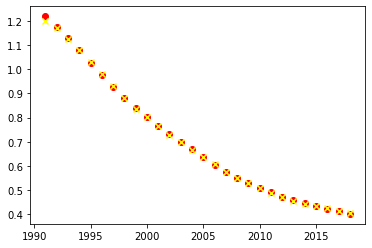

In [98]:
x=final_europe.year
plt.scatter(x, y= final_europe.reales, color = 'r')
plt.scatter(x, y=final_europe.predict, color = 'yellow', marker = 'x')

In [99]:
df_europe.to_csv("df_europe.csv", index=False)

In [100]:
final_europe.to_csv("predict_europe.csv", index=False)

In [101]:
Africa= ['Djibouti','Seychelles','DR Congo','Comoros','Togo','Sierra Leone','Libya','Tanzania','South Africa','Cabo Verde','Congo','Kenya','Liberia','Central African Republic','Mauritania','Uganda',
         'Algeria','Sudan','Morocco','Eritrea','Angola','Mozambique','Ghana','Madagascar','Cameroon',"Cote d'Ivoire",'Namibia',	'Niger','Gambia','Botswana','Gabon','Sao Tome and Principe','Lesotho',	
         'Burkina Faso', 'Nigeria',	'Mali',	'Guinea-Bissau','Malawi', 'Zambia',	'Senegal','Chad','Somalia',	'Zimbabwe',	'Equatorial Guinea','Guinea','Rwanda','Mauritius','Benin','Burundi',	
         'Tunisia',	'Eswatini',	'Ethiopia',	'South Sudan','Egypt']

In [102]:
africa_list = [x for x in Africa if x in paises]
print(sorted(africa_list))

['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']


In [103]:
df_africa=df[df['entity'].isin(africa_list)]

<AxesSubplot:xlabel='year', ylabel='mortality_rate'>

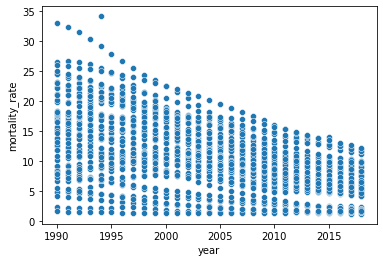

In [104]:
sns.scatterplot(x ='year', y= 'mortality_rate', data=df_africa)

In [105]:
df_africa[['entity', 'mortality_rate']].sort_values(by= 'mortality_rate')

,entity,mortality_rate
2841,Libya,1.190000
2840,Libya,1.230000
2839,Libya,1.280000
2838,Libya,1.330000
4365,Seychelles,1.370000
...,...,...
3599,Niger,30.400000
3598,Niger,31.439999
3597,Niger,32.300000
3596,Niger,32.960001


In [106]:
indice_africa= df_africa.groupby('entity',as_index = False)['mortality_rate'].mean()
indice_africa= indice_africa.sort_values(by= 'mortality_rate').reset_index(drop=True)

In [107]:
df_africa= df_africa.assign(region="Africa")
df_africa.head(3)

,entity,code,year,deaths_malaria,deaths_hiv,deaths_meningitis,deaths_nutritional_def,deaths_other_nd,deaths_cough,deaths_lorespi,...,mortality_rate,population_povertyline,health_expenditure,population_estimates,electricity_access,incomeUS,incomeUS_pc,death_rate(per1000),education_exp,region
58,Algeria,DZA,1990,0,15,497,316,3326,628,5070,...,4.91,5.051997,1088.976174,25758872,78.963223,4.804000e+10,1864.988498,6.207,14.01654,Africa
59,Algeria,DZA,1991,0,17,464,302,3231,552,4662,...,4.77,6.265288,1088.976174,26400468,78.963223,3.574000e+10,1353.763880,6.035,14.01654,Africa
60,Algeria,DZA,1992,0,18,436,287,3131,490,4321,...,4.66,5.830436,1088.976174,27028330,78.963223,3.850000e+10,1424.431328,5.887,14.01654,Africa


In [108]:
df_africa.to_csv("paises_africa.csv", index=False)

In [109]:
df_africa= df_africa.groupby('year',as_index = False)[['mortality_rate','population_povertyline', 'health_expenditure','incomeUS_pc', 'education_exp']].mean()
df_africa.head(2)

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp
0,1990,15.000784,42.426639,1088.976174,630.925964,14.139222
1,1991,14.816471,42.858341,1088.976174,647.309448,14.164828


In [110]:
df_africa['lag1'] = df_africa.mortality_rate.shift(1)

In [111]:
df_africa= df_africa.iloc[1:30] 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df_africa.drop(['mortality_rate', 'year'], axis=1), 
                                                    df_africa['mortality_rate'], 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )

X_train.shape, X_test.shape

((22, 5), (6, 5))

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 18 to 7
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   population_povertyline  22 non-null     float64
 1   health_expenditure      22 non-null     float64
 2   incomeUS_pc             22 non-null     float64
 3   education_exp           22 non-null     float64
 4   lag1                    22 non-null     float64
dtypes: float64(5)
memory usage: 1.0 KB


In [114]:
ratelat_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('model', LinearRegression())], verbose = True)

In [115]:
ratelat_pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())],
         verbose=True)

In [116]:
X_train_pred = ratelat_pipeline.predict(X_train)

In [117]:
ratelat_pipeline.score(X_train, y_train)

0.9992443588299741

In [118]:
X_train_pred

array([ 9.15603907,  7.40316686, 11.71193678, 10.83181756,  9.95824117,
       14.56546269, 14.36591551, 13.90882775, 14.50277293,  9.52553491,
        7.0684228 , 14.41870486,  6.47536151,  6.93303889,  8.85093363,
        6.27649719,  8.06341338, 13.42875127, 12.07313952, 10.35464468,
        8.38214983, 13.62169762])

In [119]:
ratelat_pipeline.score(X_test, y_test)

0.9983677366891502

In [120]:
X_test_pred = ratelat_pipeline.predict(X_test)
X_test_pred

array([12.44072135,  6.78104183, 12.97579557,  7.66951901, 14.59466364,
       11.2773533 ])

In [121]:
y_test

10    12.595686
26     6.694314
9     12.987059
22     7.702745
1     14.816471
13    11.254510
Name: mortality_rate, dtype: float64

In [122]:
train= pd.DataFrame({'reales':y_train, "predict": X_train_pred})
test= pd.DataFrame({'reales':y_test, "predict": X_test_pred})

In [123]:
final_africa = pd.concat([train, test])
final_africa.head(5)

,reales,predict
18,9.129216,9.156039
23,7.414706,7.403167
12,11.705882,11.711937
14,10.810980,10.831818
16,9.929412,9.958241


In [124]:
final_africa["year"]= df_africa.year

In [125]:
final_africa = final_africa.reindex(columns=['year','reales','predict'])
final_africa.sort_values(by='year').head(3)

,year,reales,predict
1,1991,14.816471,14.594664
2,1992,14.649412,14.565463
3,1993,14.532745,14.502773


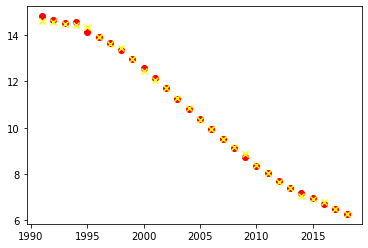

In [126]:
x=final_africa.year
plt.scatter(x, y= final_africa.reales, color = 'r')
plt.scatter(x, y=final_africa.predict, color = 'yellow', marker = 'x')

In [127]:
df_africa.to_csv("df_africa.csv", index=False)

In [128]:
final_africa.to_csv("predict_africa.csv", index=False)

In [129]:
print(sorted(paises))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamai

In [130]:
Asia= ['United Arab Emirates','Vietnam','Tajikistan','Israel','Turkey','Iran','Bhutan','Laos','Thailand','Lebanon','Kyrgyzstan','Turkmenistan','Singapore','Myanmar','Maldives',	
'South Korea','Oman','State of Palestine','Brunei','Kuwait','Iraq','Georgia','Afghanistan',	'Saudi Arabia',	'Uzbekistan','Mongolia','Malaysia',	'Yemen','Armenia','Nepal','Qatar',	
'Indonesia','North Korea','Pakistan','Sri Lanka','Kazakhstan','Syria','Bahrain','Cambodia','Bangladesh','China','Timor','Japan','Cyprus','Philippines','Jordan','Azerbaijan','India']

In [131]:
asia_list = [x for x in Asia if x in paises]
print(sorted(asia_list))

['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']


In [132]:
df_asia=df[df['entity'].isin(asia_list)]

<AxesSubplot:xlabel='year', ylabel='mortality_rate'>

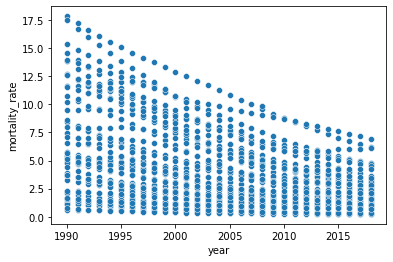

In [133]:
sns.scatterplot(x ='year', y= 'mortality_rate', data=df_asia)

In [134]:
df_asia[['entity', 'mortality_rate']].sort_values(by= 'mortality_rate')

,entity,mortality_rate
4436,Singapore,0.250000
4435,Singapore,0.260000
2492,Japan,0.260000
2493,Japan,0.260000
2490,Japan,0.270000
...,...,...
2,Afghanistan,16.630000
4931,Timor,16.730000
1,Afghanistan,17.220000
4930,Timor,17.520000


In [135]:
indice_asia= df_asia.groupby('entity',as_index = False)['mortality_rate'].mean()
indice_asia= indice_asia.sort_values(by= 'mortality_rate').reset_index(drop=True)

In [136]:
indice_asia.to_csv("paises_asia.csv", index=False)

In [137]:
df_asia= df_asia.assign(region="Asia")
df_asia.head(3)

,entity,code,year,deaths_malaria,deaths_hiv,deaths_meningitis,deaths_nutritional_def,deaths_other_nd,deaths_cough,deaths_lorespi,...,mortality_rate,population_povertyline,health_expenditure,population_estimates,electricity_access,incomeUS,incomeUS_pc,death_rate(per1000),education_exp,region
0,Afghanistan,AFG,1990,21,10,1709,1779,7112,2455,20224,...,17.839999,0.0,1088.976174,12412311,78.963223,0.0,0.0,15.241,14.01654,Asia
1,Afghanistan,AFG,1991,41,12,1743,1822,7574,2385,20879,...,17.220000,0.0,1088.976174,13299016,78.963223,0.0,0.0,14.783,14.01654,Asia
2,Afghanistan,AFG,1992,51,13,1954,2069,8614,2370,23585,...,16.630000,0.0,1088.976174,14485543,78.963223,0.0,0.0,14.362,14.01654,Asia


In [138]:
df_asia= df_asia.groupby('year',as_index = False)[['mortality_rate','population_povertyline', 'health_expenditure','incomeUS_pc', 'education_exp']].mean()
df_asia.head(2)

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp
0,1990,6.821522,16.398817,1088.976174,2429.882292,13.839762
1,1991,6.604348,17.639548,1088.976174,2386.505993,13.713424


In [139]:
df_asia['lag1'] = df_asia.mortality_rate.shift(1)

In [140]:
df_asia= df_asia.iloc[1:30] 

In [141]:
X_train, X_test, y_train, y_test = train_test_split(df_asia.drop(['mortality_rate', 'year'], axis=1), 
                                                    df_asia['mortality_rate'], 
                                                    test_size=0.2, 
                                                    random_state=42
                                                    )

X_train.shape, X_test.shape

((22, 5), (6, 5))

In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 18 to 7
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   population_povertyline  22 non-null     float64
 1   health_expenditure      22 non-null     float64
 2   incomeUS_pc             22 non-null     float64
 3   education_exp           22 non-null     float64
 4   lag1                    22 non-null     float64
dtypes: float64(5)
memory usage: 1.0 KB


In [143]:
ratelat_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('model', LinearRegression())], verbose = True)

In [144]:
ratelat_pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())],
         verbose=True)

In [145]:
X_train_pred = ratelat_pipeline.predict(X_train)

In [146]:
ratelat_pipeline.score(X_train, y_train)

0.9997495984875943

In [147]:
X_train_pred

array([3.09591008, 2.5213129 , 4.19589735, 3.77402981, 3.39176198,
       6.40867789, 5.81818462, 5.61247635, 6.19079507, 3.22732513,
       2.42380395, 5.97281531, 2.18058178, 2.34296479, 2.9933203 ,
       2.06480199, 2.69082458, 5.14584029, 4.42624168, 3.6184644 ,
       2.80231024, 5.37905079])

In [148]:
ratelat_pipeline.score(X_test, y_test)

0.9997198651694879

In [149]:
X_test_pred = ratelat_pipeline.predict(X_test)
X_test_pred

array([4.64853076, 2.2725597 , 4.93771206, 2.56847972, 6.62287919,
       3.97831844])

In [150]:
y_test

10    4.667826
26    2.262609
9     4.907609
22    2.611304
1     6.604348
13    3.972174
Name: mortality_rate, dtype: float64

In [151]:
train= pd.DataFrame({'reales':y_train, "predict": X_train_pred})
test= pd.DataFrame({'reales':y_test, "predict": X_test_pred})

In [152]:
final_asia = pd.concat([train, test])
final_asia.head(5)

,reales,predict
18,3.136304,3.095910
23,2.528043,2.521313
12,4.192826,4.195897
14,3.815217,3.774030
16,3.393696,3.391762


In [153]:
final_asia["year"]= df_asia.year

In [220]:
final_asia = final_asia.reindex(columns=['year','reales','predict'])
final_asia.sort_values(by='year').head(3)

,year,reales,predict
1,1991,6.604348,6.622879
2,1992,6.402609,6.408678
3,1993,6.206304,6.190795


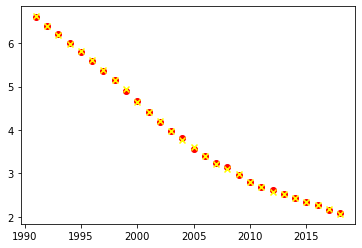

In [155]:
x=final_asia.year
plt.scatter(x, y= final_asia.reales, color = 'r')
plt.scatter(x, y=final_asia.predict, color = 'yellow', marker = 'x')

In [156]:
df_asia.to_csv("df_asia.csv", index=False)

In [157]:
final_asia.to_csv("predict_asia.csv", index=False)

### COMIENZA COMPROBACIÓN DEL MODELO

In [158]:
df_test= pd.read_csv('predict4years.csv')

In [159]:
df_test.head()

,entity,code,year,health_expenditure,education_exp,incomeUS_pc,population_povertyline,mortality_rate
0,Afghanistan,AFG,2018,69.998604,11.69606,452.362622,NaN,6.23
1,Afghanistan,AFG,2019,65.806030,11.34377,463.843374,NaN,6.01
2,Afghanistan,AFG,2020,NaN,10.25386,475.620362,NaN,5.80
3,Albania,ALB,2018,274.914093,NaN,4318.911492,1.138010,0.95
4,Albania,ALB,2019,NaN,13.43000,4337.131083,0.868742,0.97


In [160]:
df_test.shape

(567, 8)

In [161]:
df_test.isnull().sum()

entity                      0
code                        0
year                        0
health_expenditure        208
education_exp             218
incomeUS_pc                66
population_povertyline    254
mortality_rate             15
dtype: int64

In [162]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   entity                  567 non-null    object 
 1   code                    567 non-null    object 
 2   year                    567 non-null    int64  
 3   health_expenditure      359 non-null    float64
 4   education_exp           349 non-null    float64
 5   incomeUS_pc             501 non-null    float64
 6   population_povertyline  313 non-null    float64
 7   mortality_rate          552 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 35.6+ KB


In [163]:
impmedian= mdi.MeanMedianImputer(imputation_method='median', variables=['mortality_rate', 'education_exp'])
df_test = impmedian.fit_transform(df_test) 

In [164]:
impmean= mdi.MeanMedianImputer(imputation_method='mean', variables=['health_expenditure', 'population_povertyline'])
df_test = impmean.fit_transform(df_test) 

In [165]:
df_test= df_test.replace(to_replace = np.nan, value = 0)

In [166]:
paises= ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (country)', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

In [167]:
latinoamerica_t= 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Cayman Islands', 'Cuba', 'Dominica', 'Dominican Republic', 'Grenada', 'Guadeloupe', 'Haiti', 'Jamaica', 'Martinique','Puerto Rico','Trinidad and Tobago', 'Turks and Caicos Islands', 'Virgin Islands', 'Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'

In [168]:
final_t = [x for x in latinoamerica_t if x in paises]
len(final_t)

31

In [169]:
df_latin_modelo=df_test[df_test['entity'].isin(final_t)]
df_latin_modelo.columns

Index(['entity', 'code', 'year', 'health_expenditure', 'education_exp',
       'incomeUS_pc', 'population_povertyline', 'mortality_rate'],
      dtype='object')

In [170]:
df_latin_modelo.mortality_rate.min()

0.50999999

In [171]:
df_latin_modelo.mortality_rate.max()

6.409999847

In [172]:
df_latin_modelo.head()

,entity,code,year,health_expenditure,education_exp,incomeUS_pc,population_povertyline,mortality_rate
15,Antigua and Barbuda,ATG,2018,808.699280,7.230617,0.000000,12.85287,0.69
16,Antigua and Barbuda,ATG,2019,760.264954,8.547490,0.000000,12.85287,0.66
17,Antigua and Barbuda,ATG,2020,1170.936680,8.941780,0.000000,12.85287,0.64
18,Argentina,ARG,2018,1127.928467,12.523340,9813.558914,12.85287,0.97
19,Argentina,ARG,2019,945.991943,12.530070,8262.878744,12.85287,0.91


In [173]:
df_latin_modelo= df_latin_modelo.assign(region="Latin America")
df_latin_modelo.head(3)

,entity,code,year,health_expenditure,education_exp,incomeUS_pc,population_povertyline,mortality_rate,region
15,Antigua and Barbuda,ATG,2018,808.699280,7.230617,0.0,12.85287,0.69,Latin America
16,Antigua and Barbuda,ATG,2019,760.264954,8.547490,0.0,12.85287,0.66,Latin America
17,Antigua and Barbuda,ATG,2020,1170.936680,8.941780,0.0,12.85287,0.64,Latin America


In [174]:
df_latam_model= df_latin_modelo.groupby('year',as_index = False)[['mortality_rate','population_povertyline', 'health_expenditure','incomeUS_pc', 'education_exp']].mean()
df_latam_model

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp
0,2018,1.816452,7.448545,684.088204,6783.811456,15.870725
1,2019,1.799355,7.157916,680.736049,6554.976055,15.032819
2,2020,1.722903,12.852870,1170.936680,5565.235412,15.033049


In [175]:
df_latam_model['lag1'] = df_latam_model.mortality_rate.shift(1)
df_latam_model

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp,lag1
0,2018,1.816452,7.448545,684.088204,6783.811456,15.870725,NaN
1,2019,1.799355,7.157916,680.736049,6554.976055,15.032819,1.816452
2,2020,1.722903,12.852870,1170.936680,5565.235412,15.033049,1.799355


In [176]:
df_latam_model= df_latam_model.iloc[1:3]
df_latam_model

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp,lag1
1,2019,1.799355,7.157916,680.736049,6554.976055,15.032819,1.816452
2,2020,1.722903,12.852870,1170.936680,5565.235412,15.033049,1.799355


In [237]:
#df_latam_model.drop(['mortality_rate', 'year'], axis=1, inplace=True)

In [178]:
prediccionest_lat= ratelat_pipeline.predict(df_latam_model)
prediccionest_lat

array([1.59838416, 1.53444517])

In [179]:
## EUROPA

In [180]:
print(europe)

['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Gibraltar', 'Guadeloupe', 'Madeira', 'Martinique', 'Mayotte']


In [181]:
final_e = [x for x in europe if x in paises]
len(final_e)

27

In [182]:
df_euro_modelo=df_test[df_test['entity'].isin(final_e)]
df_euro_modelo.columns

Index(['entity', 'code', 'year', 'health_expenditure', 'education_exp',
       'incomeUS_pc', 'population_povertyline', 'mortality_rate'],
      dtype='object')

In [183]:
df_euro_modelo.mortality_rate.min()

0.20999999

In [184]:
df_euro_modelo.mortality_rate.max()

0.74000001

In [185]:
df_euro_modelo.head()

,entity,code,year,health_expenditure,education_exp,incomeUS_pc,population_povertyline,mortality_rate
27,Austria,AUT,2018,5322.262695,10.71942,41596.61338,0.568358,0.36
28,Austria,AUT,2019,5242.183105,14.20000,40682.03813,0.568358,0.36
29,Austria,AUT,2020,1170.936680,14.20000,38848.20149,12.852870,0.36
48,Belgium,BEL,2018,5134.414551,12.21550,39066.43551,0.081114,0.42
49,Belgium,BEL,2019,4960.393555,14.20000,38282.85629,0.081114,0.42


In [186]:
df_euro_modelo= df_euro_modelo.assign(region="Europa")
df_euro_modelo.head(3)

,entity,code,year,health_expenditure,education_exp,incomeUS_pc,population_povertyline,mortality_rate,region
27,Austria,AUT,2018,5322.262695,10.71942,41596.61338,0.568358,0.36,Europa
28,Austria,AUT,2019,5242.183105,14.20000,40682.03813,0.568358,0.36,Europa
29,Austria,AUT,2020,1170.936680,14.20000,38848.20149,12.852870,0.36,Europa


In [187]:
df_euro_modelo= df_euro_modelo.groupby('year',as_index = False)[['mortality_rate','population_povertyline', 'health_expenditure','incomeUS_pc', 'education_exp']].mean()
df_euro_modelo

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp
0,2018,0.401481,0.393133,3045.546276,26911.072072,11.376197
1,2019,0.391481,0.373632,3007.602469,26343.328718,14.118256
2,2020,0.383333,12.852870,1170.936680,25865.235140,14.200000


In [188]:
df_euro_modelo['lag1'] = df_euro_modelo.mortality_rate.shift(1)
df_euro_modelo

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp,lag1
0,2018,0.401481,0.393133,3045.546276,26911.072072,11.376197,NaN
1,2019,0.391481,0.373632,3007.602469,26343.328718,14.118256,0.401481
2,2020,0.383333,12.852870,1170.936680,25865.235140,14.200000,0.391481


In [189]:
df_euro_modelo= df_euro_modelo.iloc[1:3]
df_euro_modelo

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp,lag1
1,2019,0.391481,0.373632,3007.602469,26343.328718,14.118256,0.401481
2,2020,0.383333,12.852870,1170.936680,25865.235140,14.200000,0.391481


In [236]:
#df_euro_modelo.drop(['mortality_rate', 'year'], axis=1, inplace=True)

In [191]:
prediccionest_europe= ratelat_pipeline.predict(df_euro_modelo)
prediccionest_europe

array([0.65765676, 0.18701568])

In [192]:
## Africa

In [193]:
print(Africa)

['Djibouti', 'Seychelles', 'DR Congo', 'Comoros', 'Togo', 'Sierra Leone', 'Libya', 'Tanzania', 'South Africa', 'Cabo Verde', 'Congo', 'Kenya', 'Liberia', 'Central African Republic', 'Mauritania', 'Uganda', 'Algeria', 'Sudan', 'Morocco', 'Eritrea', 'Angola', 'Mozambique', 'Ghana', 'Madagascar', 'Cameroon', "Cote d'Ivoire", 'Namibia', 'Niger', 'Gambia', 'Botswana', 'Gabon', 'Sao Tome and Principe', 'Lesotho', 'Burkina Faso', 'Nigeria', 'Mali', 'Guinea-Bissau', 'Malawi', 'Zambia', 'Senegal', 'Chad', 'Somalia', 'Zimbabwe', 'Equatorial Guinea', 'Guinea', 'Rwanda', 'Mauritius', 'Benin', 'Burundi', 'Tunisia', 'Eswatini', 'Ethiopia', 'South Sudan', 'Egypt']


In [194]:
final_a = [x for x in Africa if x in paises]
len(final_a)

51

In [195]:
df_africa_modelo=df_test[df_test['entity'].isin(final_a)]
df_africa_modelo.columns

Index(['entity', 'code', 'year', 'health_expenditure', 'education_exp',
       'incomeUS_pc', 'population_povertyline', 'mortality_rate'],
      dtype='object')

In [196]:
df_africa_modelo.mortality_rate.min()

1.110000038

In [197]:
df_africa_modelo.mortality_rate.max()

12.2

In [198]:
df_africa_modelo.head()

,entity,code,year,health_expenditure,education_exp,incomeUS_pc,population_povertyline,mortality_rate
6,Algeria,DZA,2018,256.009460,13.774950,3241.392326,0.322391,2.38
7,Algeria,DZA,2019,248.205872,14.463480,3151.661357,0.321086,2.33
8,Algeria,DZA,2020,1170.936680,16.549191,2735.094455,12.852870,2.27
12,Angola,AGO,2018,87.310738,5.410232,2082.698449,49.087430,7.73
13,Angola,AGO,2019,71.326004,6.045356,1766.910438,51.395540,7.42


In [199]:
df_africa_modelo= df_africa_modelo.assign(region="Africa")
df_africa_modelo.head(3)

,entity,code,year,health_expenditure,education_exp,incomeUS_pc,population_povertyline,mortality_rate,region
6,Algeria,DZA,2018,256.009460,13.774950,3241.392326,0.322391,2.38,Africa
7,Algeria,DZA,2019,248.205872,14.463480,3151.661357,0.321086,2.33,Africa
8,Algeria,DZA,2020,1170.936680,16.549191,2735.094455,12.852870,2.27,Africa


In [200]:
df_africa_modelo= df_africa_modelo.groupby('year',as_index = False)[['mortality_rate','population_povertyline', 'health_expenditure','incomeUS_pc', 'education_exp']].mean()
df_africa_modelo

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp
0,2018,6.290196,32.925549,166.843994,1993.017931,15.520856
1,2019,6.105686,32.605307,162.673206,1948.507888,14.707021
2,2020,5.907059,12.852870,1170.936680,1675.254413,14.352126


In [201]:
df_africa_modelo['lag1'] = df_africa_modelo.mortality_rate.shift(1)
df_africa_modelo

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp,lag1
0,2018,6.290196,32.925549,166.843994,1993.017931,15.520856,NaN
1,2019,6.105686,32.605307,162.673206,1948.507888,14.707021,6.290196
2,2020,5.907059,12.852870,1170.936680,1675.254413,14.352126,6.105686


In [202]:
df_africa_modelo= df_africa_modelo.iloc[1:3]
df_africa_modelo

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp,lag1
1,2019,6.105686,32.605307,162.673206,1948.507888,14.707021,6.290196
2,2020,5.907059,12.852870,1170.936680,1675.254413,14.352126,6.105686


In [235]:
#df_africa_modelo.drop(['mortality_rate', 'year'], axis=1, inplace=True)

In [204]:
prediccionest_africa= ratelat_pipeline.predict(df_africa_modelo)
prediccionest_africa

array([5.71693849, 5.98899459])

In [224]:
## ASIA

In [225]:
print(Asia)

['United Arab Emirates', 'Vietnam', 'Tajikistan', 'Israel', 'Turkey', 'Iran', 'Bhutan', 'Laos', 'Thailand', 'Lebanon', 'Kyrgyzstan', 'Turkmenistan', 'Singapore', 'Myanmar', 'Maldives', 'South Korea', 'Oman', 'State of Palestine', 'Brunei', 'Kuwait', 'Iraq', 'Georgia', 'Afghanistan', 'Saudi Arabia', 'Uzbekistan', 'Mongolia', 'Malaysia', 'Yemen', 'Armenia', 'Nepal', 'Qatar', 'Indonesia', 'North Korea', 'Pakistan', 'Sri Lanka', 'Kazakhstan', 'Syria', 'Bahrain', 'Cambodia', 'Bangladesh', 'China', 'Timor', 'Japan', 'Cyprus', 'Philippines', 'Jordan', 'Azerbaijan', 'India']


In [226]:
final_s = [x for x in Asia if x in paises]
len(final_s)

46

In [227]:
df_asia_modelo=df_test[df_test['entity'].isin(final_s)]
df_asia_modelo.columns

Index(['entity', 'code', 'year', 'health_expenditure', 'education_exp',
       'incomeUS_pc', 'population_povertyline', 'mortality_rate'],
      dtype='object')

In [228]:
df_asia_modelo.mortality_rate.min()

0.220000005

In [229]:
df_asia_modelo.mortality_rate.max()

6.95

In [230]:
df_asia_modelo.head()

,entity,code,year,health_expenditure,education_exp,incomeUS_pc,population_povertyline,mortality_rate
0,Afghanistan,AFG,2018,69.998604,11.69606,452.362622,12.852870,6.23
1,Afghanistan,AFG,2019,65.806030,11.34377,463.843374,12.852870,6.01
2,Afghanistan,AFG,2020,1170.936680,10.25386,475.620362,12.852870,5.80
21,Armenia,ARM,2018,422.282684,8.98858,3709.088092,1.409537,1.21
22,Armenia,ARM,2019,523.999084,10.01000,4020.892298,1.078999,1.15


In [231]:
df_asia_modelo= df_asia_modelo.assign(region="Asia")
df_asia_modelo.head(3)

,entity,code,year,health_expenditure,education_exp,incomeUS_pc,population_povertyline,mortality_rate,region
0,Afghanistan,AFG,2018,69.998604,11.69606,452.362622,12.85287,6.23,Asia
1,Afghanistan,AFG,2019,65.806030,11.34377,463.843374,12.85287,6.01,Asia
2,Afghanistan,AFG,2020,1170.936680,10.25386,475.620362,12.85287,5.80,Asia


In [232]:
df_asia_modelo.year.value_counts()

2018    45
2019    45
2020    45
Name: year, dtype: int64

In [233]:
df_asia_modelo= df_asia_modelo.groupby('year',as_index = False)[['mortality_rate','population_povertyline', 'health_expenditure','incomeUS_pc', 'education_exp']].mean()
df_asia_modelo

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp
0,2018,2.027111,6.539419,744.485186,10434.113641,14.115165
1,2019,1.961778,6.420307,756.322318,10207.870071,14.279821
2,2020,1.898889,12.852870,1170.936680,8436.754651,14.265190


In [234]:
df_asia_modelo['lag1'] = df_asia_modelo.mortality_rate.shift(1)
df_asia_modelo

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp,lag1
0,2018,2.027111,6.539419,744.485186,10434.113641,14.115165,NaN
1,2019,1.961778,6.420307,756.322318,10207.870071,14.279821,2.027111
2,2020,1.898889,12.852870,1170.936680,8436.754651,14.265190,1.961778


In [216]:
df_asia_modelo= df_asia_modelo.iloc[1:3]
df_asia_modelo

,year,mortality_rate,population_povertyline,health_expenditure,incomeUS_pc,education_exp,lag1
1,2019,1.961778,6.420307,756.322318,10207.870071,14.279821,2.027111
2,2020,1.898889,12.852870,1170.936680,8436.754651,14.265190,1.961778


In [222]:
#df_asia_modelo.drop(['mortality_rate', 'year'], axis=1, inplace=True)

In [218]:
prediccionest_asia= ratelat_pipeline.predict(df_asia_modelo)
prediccionest_asia

array([1.84039777, 1.69612786])